In [ ]:
#!pip install pandas numpy matplotlib seaborn mplsoccer scikit-learn

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('~/Documents/GitHub/youtube-videos/data/xg_model.csv')

In [2]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's do some data exploration & cleaning

In [3]:
# Let's look at the shape of our data
df.shape

(8118, 25)

In [4]:
# Look at some of our ranges for x and y
print(df.x.max())
print(df.x.min())

99.6
0.8


In [5]:
print(df.y.max())
print(df.y.min())

99.6
3.1


In [6]:
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x                8118 non-null   float64
 1   y                8118 non-null   float64
 2   is_goal          8118 non-null   bool   
 3   period           8118 non-null   object 
 4   Assisted         6038 non-null   object 
 5   Zone             8118 non-null   object 
 6   IndividualPlay   2802 non-null   object 
 7   RegularPlay      5390 non-null   object 
 8   LeftFoot         2791 non-null   object 
 9   RightFoot        3994 non-null   object 
 10  FromCorner       1194 non-null   object 
 11  FirstTouch       3925 non-null   object 
 12  Head             1300 non-null   object 
 13  BigChance        1607 non-null   object 
 14  SetPiece         393 non-null    object 
 15  Volley           810 non-null    object 
 16  FastBreak        616 non-null    object 
 17  ThrowinSetPiec

In [8]:
# Let's get rid of some columns that probably aren't going to help us. 
# You can come back and test adding these into the model later to see if they help
df.columns

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'DirectFreekick',
       'OwnGoal', 'OtherBodyPart', 'DirectCorner'],
      dtype='object')

In [9]:
df.drop(['DirectFreekick', 'DirectCorner'], axis=1, inplace=True)

In [10]:
# Let's look at the OwnGoal column since we don't want to include own goals in our model
print(df.OwnGoal.value_counts())

OwnGoal
True    27
Name: count, dtype: int64


In [11]:
df[df['OwnGoal'] == True]

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,BigChance,SetPiece,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,OwnGoal,OtherBodyPart
619,5.5,44.0,True,FirstHalf,NaN,Center,NaN,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
749,3.5,51.4,True,FirstHalf,NaN,Center,NaN,NaN,True,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,True,NaN
1382,0.8,51.8,True,SecondHalf,NaN,Center,NaN,NaN,True,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1445,3.1,41.5,True,SecondHalf,NaN,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1450,4.5,53.1,True,SecondHalf,NaN,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2259,1.4,47.9,True,SecondHalf,NaN,Center,NaN,True,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True
2322,2.7,53.6,True,FirstHalf,NaN,Center,NaN,NaN,NaN,True,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2329,3.9,48.4,True,FirstHalf,NaN,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,True,True
2739,4.5,49.3,True,FirstHalf,NaN,Center,NaN,NaN,NaN,True,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
2895,7.1,48.1,True,SecondHalf,NaN,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


In [12]:
# Let's drop the own goals from our data
df = df[df['OwnGoal'] != True]
df.drop('OwnGoal', axis=1, inplace=True)

In [13]:
df.shape

(8091, 22)

In [14]:
# Let's look at some of the value counts for our columns
print(df.is_goal.value_counts())

is_goal
False    7097
True      994
Name: count, dtype: int64


In [15]:
print(df.period.value_counts())

period
SecondHalf    4333
FirstHalf     3758
Name: count, dtype: int64


<AxesSubplot: xlabel='x', ylabel='y'>

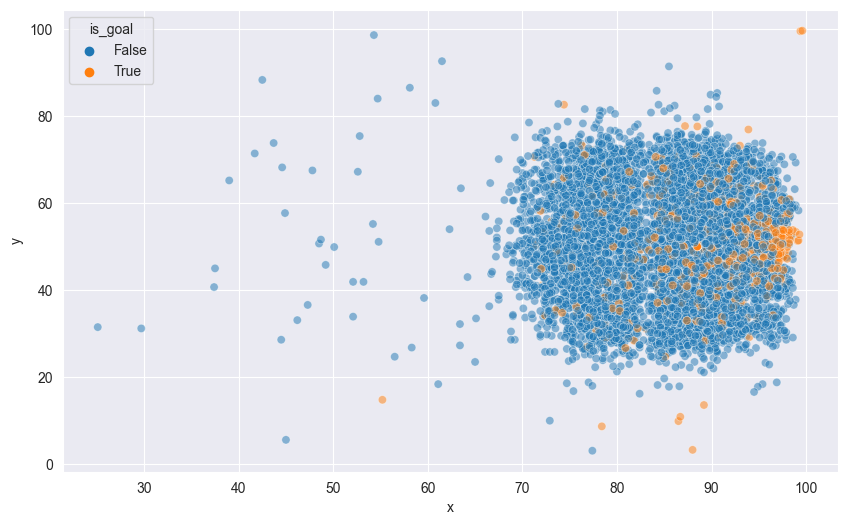

In [17]:
# Let's plot the distribution of our x and y values
# !pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.scatterplot(x='x', y='y', data=df, hue='is_goal', alpha=0.5)

In [18]:
print(df.isna().sum())

x                     0
y                     0
is_goal               0
period                0
Assisted           2053
Zone                  0
IndividualPlay     5289
RegularPlay        2714
LeftFoot           5307
RightFoot          4106
FromCorner         6903
FirstTouch         4166
Head               6793
BigChance          6484
SetPiece           7704
Volley             7281
FastBreak          7476
ThrowinSetPiece    7904
Penalty            7985
OneOnOne           7890
KeyPass            8033
OtherBodyPart      8067
dtype: int64


In [19]:
# Let's fill all of the NaN values with 0
df.fillna(0, inplace=True)

In [20]:
# Our final step of exploration is to cast all of the columns to the correct data types
print(df.columns)

Index(['x', 'y', 'is_goal', 'period', 'Assisted', 'Zone', 'IndividualPlay',
       'RegularPlay', 'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch',
       'Head', 'BigChance', 'SetPiece', 'Volley', 'FastBreak',
       'ThrowinSetPiece', 'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart'],
      dtype='object')


In [21]:
df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay':bool,
    'RegularPlay':bool,
    'LeftFoot':bool,
    'RightFoot':bool,
    'FromCorner':bool,
    'FirstTouch':bool, 
    'Head':bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak':bool,
    'ThrowinSetPiece':bool,
    'Penalty':bool, 
    'OneOnOne':bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

In [22]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
OtherBodyPart         bool
dtype: object

### Feature Engineering
We'll engineer a few features to help our model.
1. Shot distance
2. Categorical encoding 

In [23]:
goal_x, goal_y = 100, 50

# Shot distance - Euclidean distance from the goal
df["shot_distance"] = np.sqrt((df['x'] - goal_x)**2 + (df['y'] - goal_y)**2)

In [24]:
df["shot_distance"].describe()

count    8091.000000
mean       18.495064
std         8.011289
min         1.581139
25%        12.061300
50%        18.380696
75%        24.200207
max        77.150891
Name: shot_distance, dtype: float64

<AxesSubplot: >

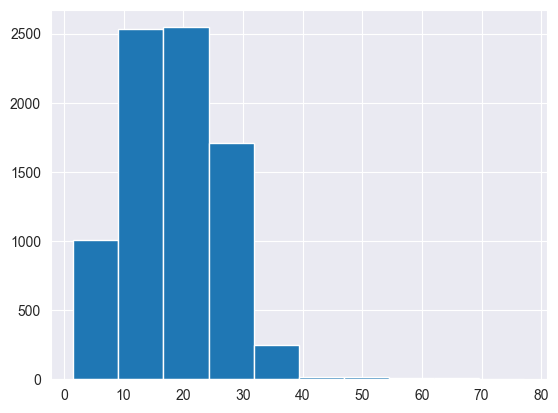

In [25]:
df["shot_distance"].hist()

In [26]:
# Let's encode our categorical columns
df = pd.get_dummies(df, columns=['period', 'Zone'])

In [27]:
df.columns

Index(['x', 'y', 'is_goal', 'Assisted', 'IndividualPlay', 'RegularPlay',
       'LeftFoot', 'RightFoot', 'FromCorner', 'FirstTouch', 'Head',
       'BigChance', 'SetPiece', 'Volley', 'FastBreak', 'ThrowinSetPiece',
       'Penalty', 'OneOnOne', 'KeyPass', 'OtherBodyPart', 'shot_distance',
       'period_FirstHalf', 'period_SecondHalf', 'Zone_Back', 'Zone_Center',
       'Zone_Left', 'Zone_Right'],
      dtype='object')

In [28]:
df.period_FirstHalf.value_counts()

period_FirstHalf
False    4333
True     3758
Name: count, dtype: int64

In [29]:
df.period_SecondHalf.value_counts()

period_SecondHalf
True     4333
False    3758
Name: count, dtype: int64

### Model Building

In [30]:
X = df.drop('is_goal', axis=1)
y = df['is_goal']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = LogisticRegression(max_iter=1000)

In [34]:
model.fit(X_train, y_train)

/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [36]:
# These are the probabilities of a goal
y_pred_proba[0:10]

array([0.07374625, 0.35039308, 0.03584597, 0.03819125, 0.1015634 ,
       0.03734041, 0.03603407, 0.04900358, 0.04642051, 0.03841601])

In [37]:
# Let's attatch these probabilities to our test data
final_df = X_test.copy()
final_df['goal_probability'] = y_pred_proba

In [39]:
final_df.iloc[830]

x                         79.1
y                         70.3
Assisted                 False
IndividualPlay           False
RegularPlay              False
LeftFoot                  True
RightFoot                False
FromCorner               False
FirstTouch               False
Head                     False
BigChance                False
SetPiece                 False
Volley                   False
FastBreak                False
ThrowinSetPiece          False
Penalty                  False
OneOnOne                 False
KeyPass                  False
OtherBodyPart            False
shot_distance        29.135889
period_FirstHalf          True
period_SecondHalf        False
Zone_Back                False
Zone_Center               True
Zone_Left                False
Zone_Right               False
goal_probability       0.05864
Name: 1808, dtype: object

In [39]:
final_df.sort_values(by='goal_probability', ascending=False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,KeyPass,OtherBodyPart,shot_distance,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,goal_probability
3671,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.829481
381,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.829481
6619,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.829481
1323,88.5,50.0,False,False,False,True,False,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.829481
3960,88.5,50.0,False,False,False,False,True,False,False,False,...,False,False,11.5,False,True,False,True,False,False,0.826261


In [50]:
# Evaluate the model
logloss = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
brier_score = brier_score_loss(y_test, y_pred_proba)

print(f"Log Loss: {logloss}")
print(f"ROC AUC: {roc_auc}")
print(f"Brier Score: {brier_score}")

Log Loss: 0.2697795849725905
ROC AUC: 0.8122632934403877
Brier Score: 0.07746583921398642


### Summary of scores
- Log Loss: How well the model predicts the probabilities of the classes. Lower is better.
- ROC AUC: The area under the ROC curve. Higher is better. Used to evaluate how well the model separates the classes.
- Brier Score: Measures the mean squared difference between the predicted probabilities and the actual outcomes. Lower is better.

In [41]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type='opta')

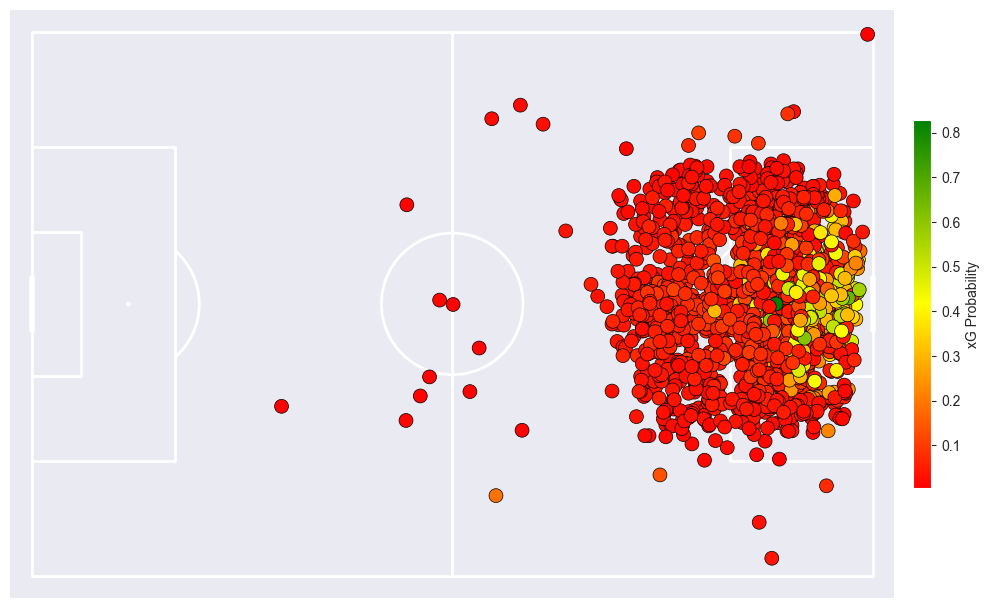

In [42]:
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the gradient
colors = ['red', 'yellow', 'green']

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list('my_colormap', colors)

fig, ax = pitch.draw(figsize=(10, 8))

# Scatter plot for shots with xG as the color
sc = pitch.scatter(
    final_df['x'], 
    final_df['y'],  # Shot coordinates
    c=final_df['goal_probability'],  # xG probabilities for color
    cmap=cmap,  # Red to green gradient
    edgecolors='black', linewidth=0.5, s=100,  # Point styling
    ax=ax
)

# Add a color bar to indicate xG values
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('xG Probability')

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, classification_report

lr = LogisticRegression()

# Define the hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Type of regularization
    'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength (smaller = stronger regularization)
    'solver': ['liblinear', 'saga'],               # Solver for optimization
    'max_iter': [100, 500, 1000]                   # Maximum number of iterations
}

# Define the scoring metric
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,               # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)          # Use all processors for parallelism

# Fit the model
grid_search.fit(X_train, y_train)



/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/metrics/_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warn

Fitting 3 folds for each of 120 candidates, totalling 360 fits


/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/mckayjohns/Documents/GitHub/youtube-videos/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1186: User

Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC Score: 0.8141356544314338
Test ROC AUC Score: 0.8123

Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94      1435
        True       0.61      0.17      0.26       184

    accuracy                           0.89      1619
   macro avg       0.76      0.58      0.60      1619
weighted avg       0.87      0.89      0.87      1619



In [ ]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {roc_auc:.4f}")

# Print classification report
y_pred = (y_pred_proba > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [51]:
model = LogisticRegression(C=100, max_iter=100, penalty='l1', solver='liblinear')

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)[:, 1]

logloss = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)
brier_score = brier_score_loss(y_test, y_pred_proba)

print(f"Log Loss: {logloss}")
print(f"ROC AUC: {roc_auc}")
print(f"Brier Score: {brier_score}")

Log Loss: 0.26977442646789923
ROC AUC: 0.81233525223451
Brier Score: 0.07746797257104197
